In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
display(data_train.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# some age value are missing - fill with median age
med_age = np.median(data_train['Age'].dropna().values)
print('median age', med_age)
data_train = data_train.fillna(value={'Age' : med_age})
data_test = data_test.fillna(value={'Age' : med_age})

# fill in missing fare values
med_fare = np.median(data_train['Fare'].dropna().values)
print('median fare', med_fare)
data_test = data_test.fillna(value={'Fare' : med_fare})

# don't include target column, 'irrelevant' features
drop_cols = ['Survived', 'Name', 'Ticket', 'Cabin']
X_train = data_train.drop(columns=drop_cols).values
y_train = data_train['Survived'].values
X_test = data_test.drop(columns=drop_cols[1:]).values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

# encode string categories as ints
le = LabelEncoder().fit(X_train[:,2])
X_train[:,2] = le.transform(X_train[:,2])
X_test[:,2] = le.transform(X_test[:,2])
le = LabelEncoder().fit(X_train[:,-1].astype(str))
X_train[:,-1] = le.transform(X_train[:,-1].astype(str))
X_test[:,-1] = le.transform(X_test[:,-1].astype(str))

print(X_train[:10])

median age 28.0
median fare 14.4542
(891, 8)
(891,)
(418, 8)
[[1 3 1 22.0 1 0 7.25 2]
 [2 1 0 38.0 1 0 71.2833 0]
 [3 3 0 26.0 0 0 7.925 2]
 [4 1 0 35.0 1 0 53.1 2]
 [5 3 1 35.0 0 0 8.05 2]
 [6 3 1 28.0 0 0 8.4583 1]
 [7 1 1 54.0 0 0 51.8625 2]
 [8 3 1 2.0 3 1 21.075 2]
 [9 3 0 27.0 0 2 11.1333 2]
 [10 2 0 14.0 1 0 30.0708 0]]


In [6]:
y_train_counts = np.bincount(y_train)
print('{0} died, {1} survived'.format(y_train_counts[0], y_train_counts[1]))

549 died, 342 survived


In [7]:
def show_histogram(colname, bins=None):
    survived = data_train.loc[lambda df: df.Survived == 1][colname]
    not_survived = data_train.loc[lambda df: df.Survived == 0][colname]
    plt.hist([survived, not_survived], bins=bins,
             stacked=True, histtype='barstacked', align='mid',
             color=['orange', 'blue'], label=['Survived', 'Not Survived'])
    plt.legend()
    plt.title(colname)
    plt.show()

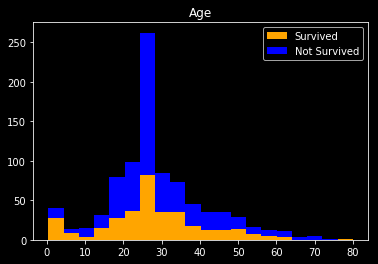

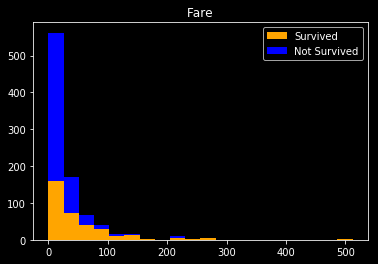

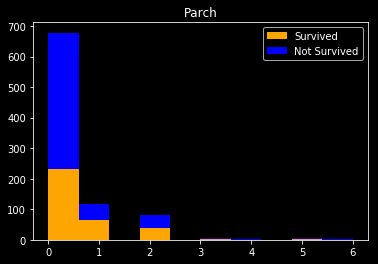

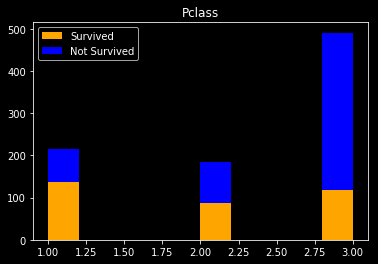

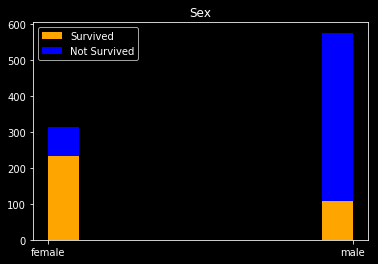

In [13]:
plt.style.use('dark_background')
show_histogram('Age', 20)
show_histogram('Fare', 20)
show_histogram('Parch')
show_histogram('Pclass')
show_histogram('Sex')

In [9]:
forest_clf = RandomForestClassifier(n_estimators=50, bootstrap=True)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
train_acc = forest_clf.score(X_train, y_train)
print(train_acc)

1.0


In [11]:
pred = forest_clf.predict(X_test)
submission = pd.DataFrame(data={'PassengerId' : X_test[:,0], 'Survived' : pred})
display(submission.head(10))
submission.to_csv('submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
